In [1]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np
from collections import defaultdict
import louvain
import pandas as  pd
from community import community_louvain
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\wyw25\AppData\Local\Temp/ipykernel_35376/4124935950.py:5: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [2]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(20, 20)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)

In [3]:
def Sort_by_degree(degree_list,node_in_block):
    
    list2=degree_list
    result = [i for i in degree_list if i in node_in_block]
    
    return result
    

In [4]:
def Get_Order_List(community_dict,degree):
    
    degree_sort={k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}
    degree_list=list(degree_sort.keys())
    
    Comms = defaultdict(list)
    for node_index, comm_id in community_dict.items():
        Comms[comm_id].append(node_index)
    
    Blocks_mark = Comms.values()
    
    nodes_ordered=[]
    key_node_list=[]
    for comm_id in  Comms:
        node_in_block=Comms[comm_id]
        sort_degree_comm=Sort_by_degree(degree_list,node_in_block)
        key_nodes=sort_degree_comm[0]
        key_node_list.append(key_nodes)
        nodes_ordered=nodes_ordered+sort_degree_comm
        
    return Blocks_mark,nodes_ordered,key_node_list
    

In [19]:
# load the network
year='2018-03-31'
adjmatrix=pd.read_csv('mat'+year+'.csv',header = None)
modue_MAX_Q=pd.read_csv('C:/Users/wyw25/thesis/model_test_data/'+year+'/0/modularity_partitions_mat'+year+'.csv')
modue_MAX_I=pd.read_csv('C:/Users/wyw25/thesis/model_test_data/'+year+'/0/in-block_partitions_mat'+year+'.csv')

In [20]:
G=nx.from_pandas_adjacency(adjmatrix, create_using=None)
G_degree=dict(G.degree)

In [21]:
Q_dict=dict(modue_MAX_Q['rows'])
I_dict=dict(modue_MAX_I['rows'])
Q_blocks_mark,Q_ordered,Q_key_node_list=Get_Order_List(Q_dict,G_degree)
I_blocks_mark,I_ordered,I_key_node_list=Get_Order_List(I_dict,G_degree)

In [22]:
# Run louvain community finding algorithm
louvain_community_dict = community_louvain.best_partition(G)
louvain_blocks_mark,nodes_louvain_ordered,louvain__key_node_list=Get_Order_List(louvain_community_dict,G_degree )

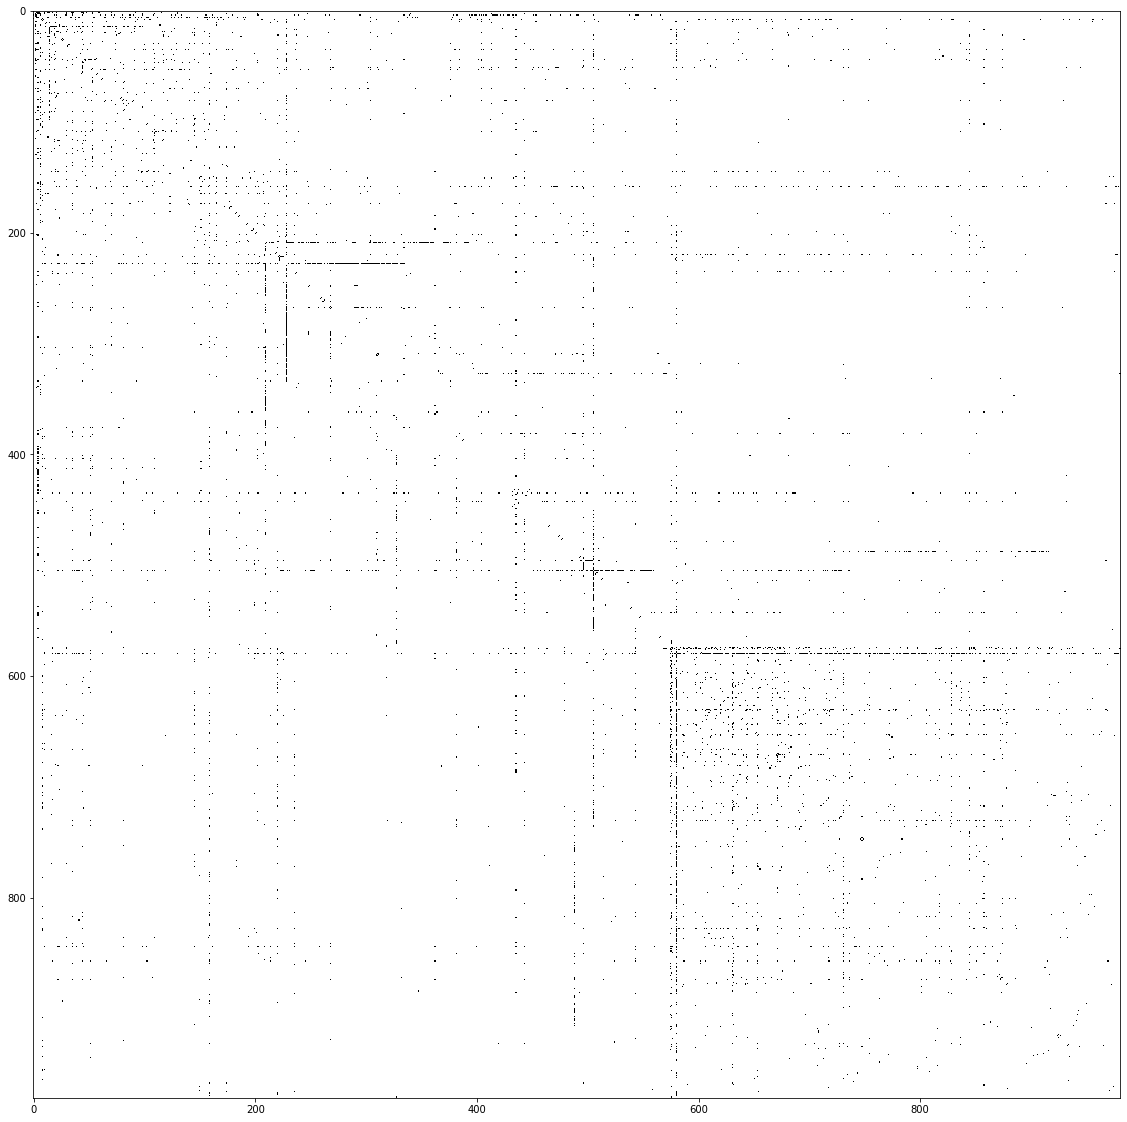

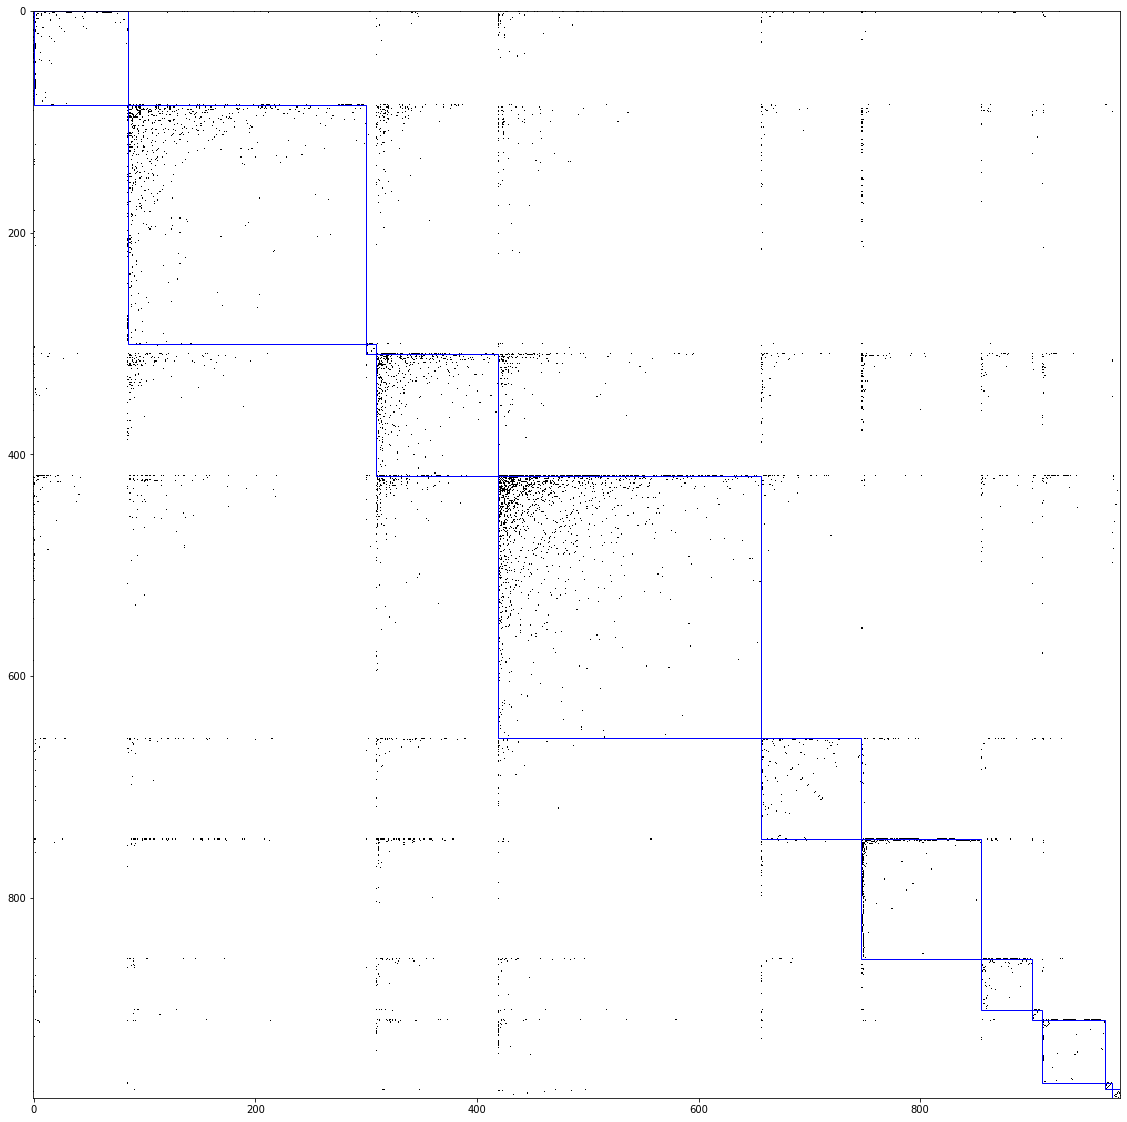

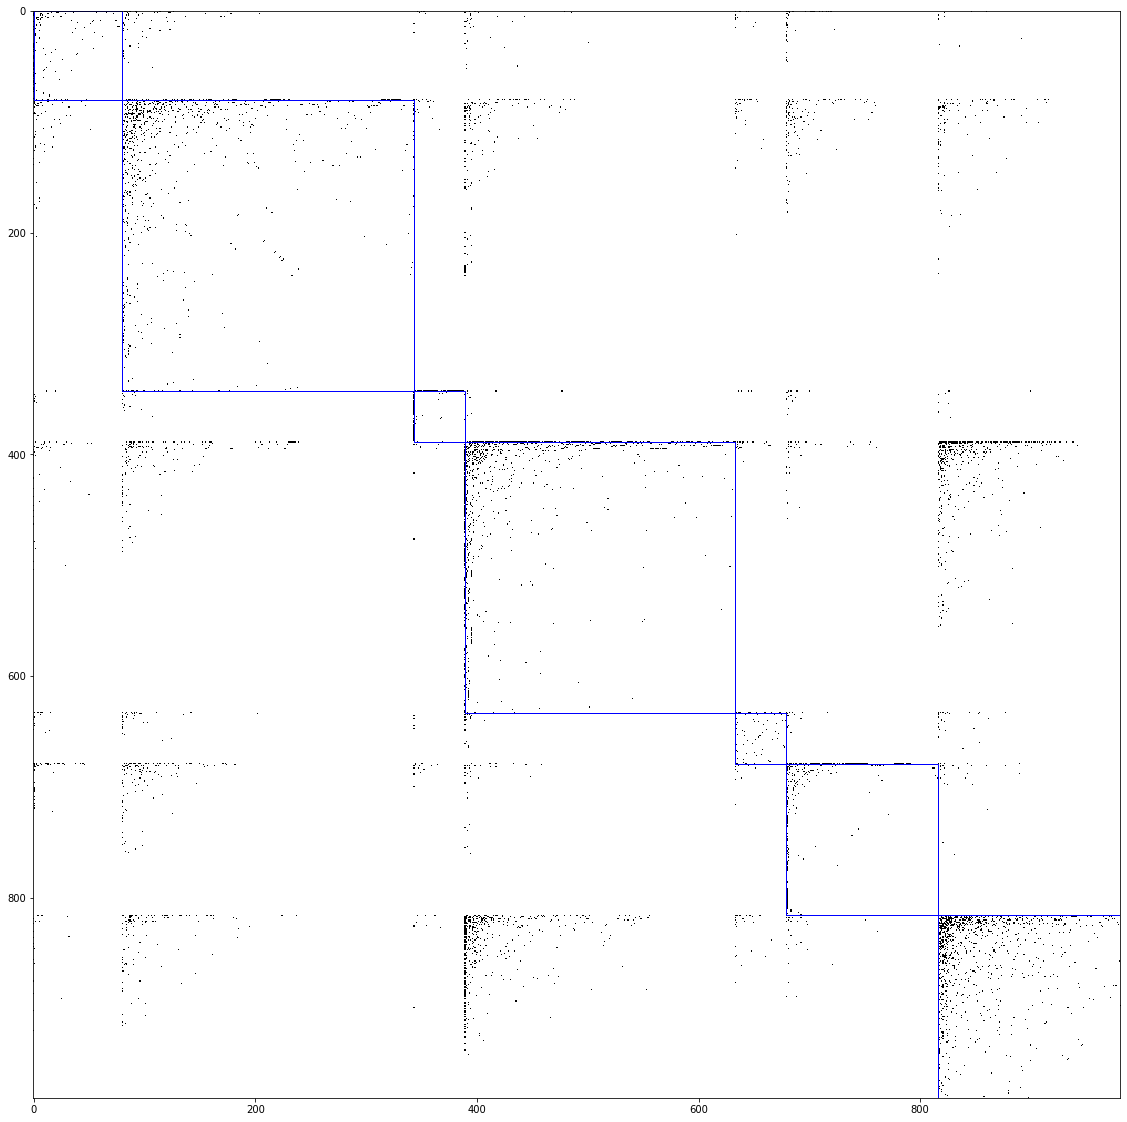

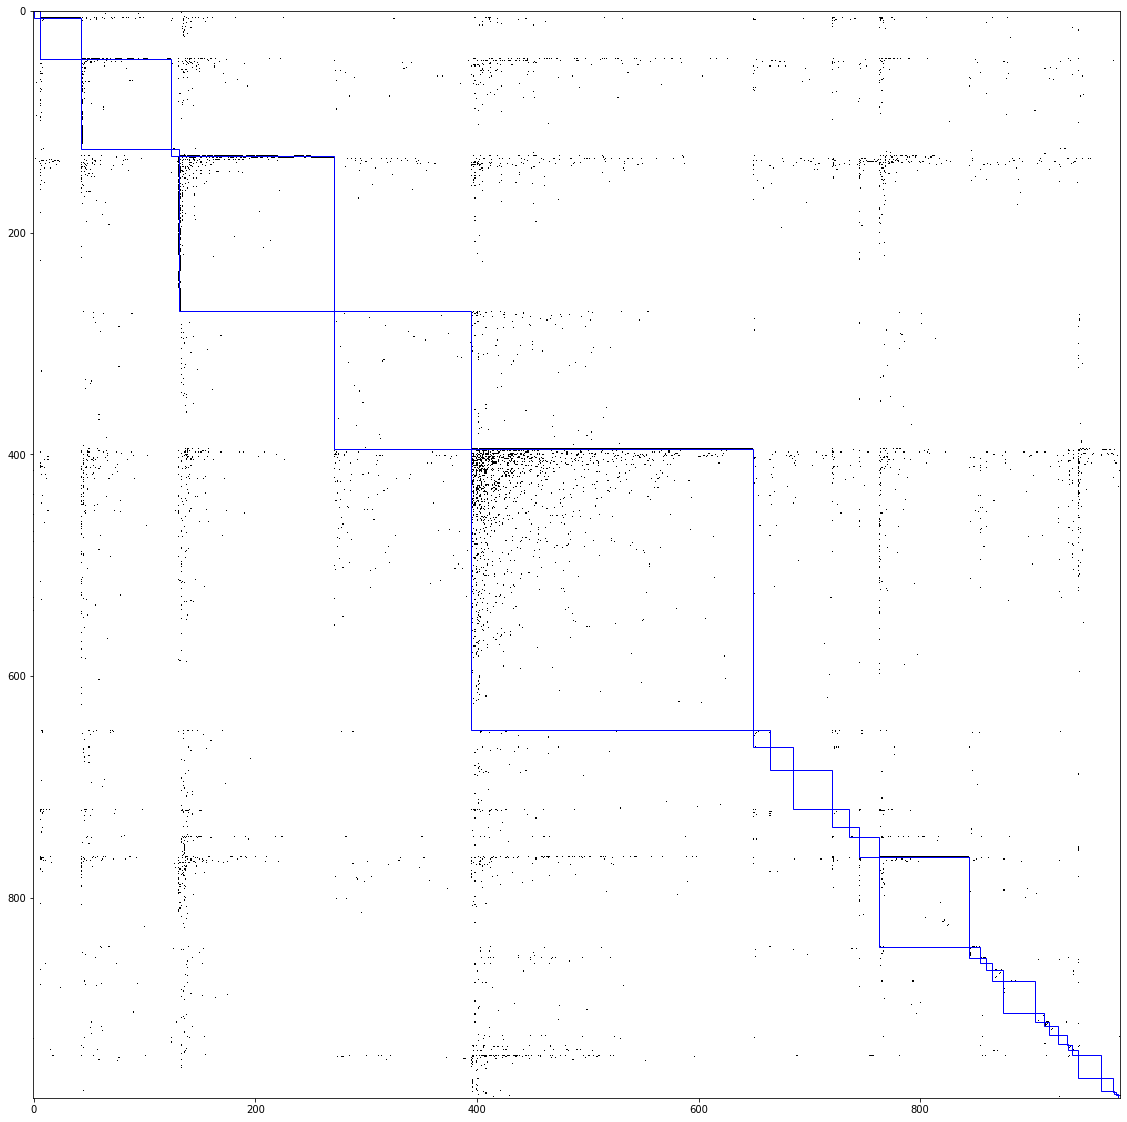

In [23]:
draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[])
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_blocks_mark], ["blue"])
draw_adjacency_matrix(G, Q_ordered, [Q_blocks_mark], ["blue"])
draw_adjacency_matrix(G, I_ordered, [I_blocks_mark], ["blue"])

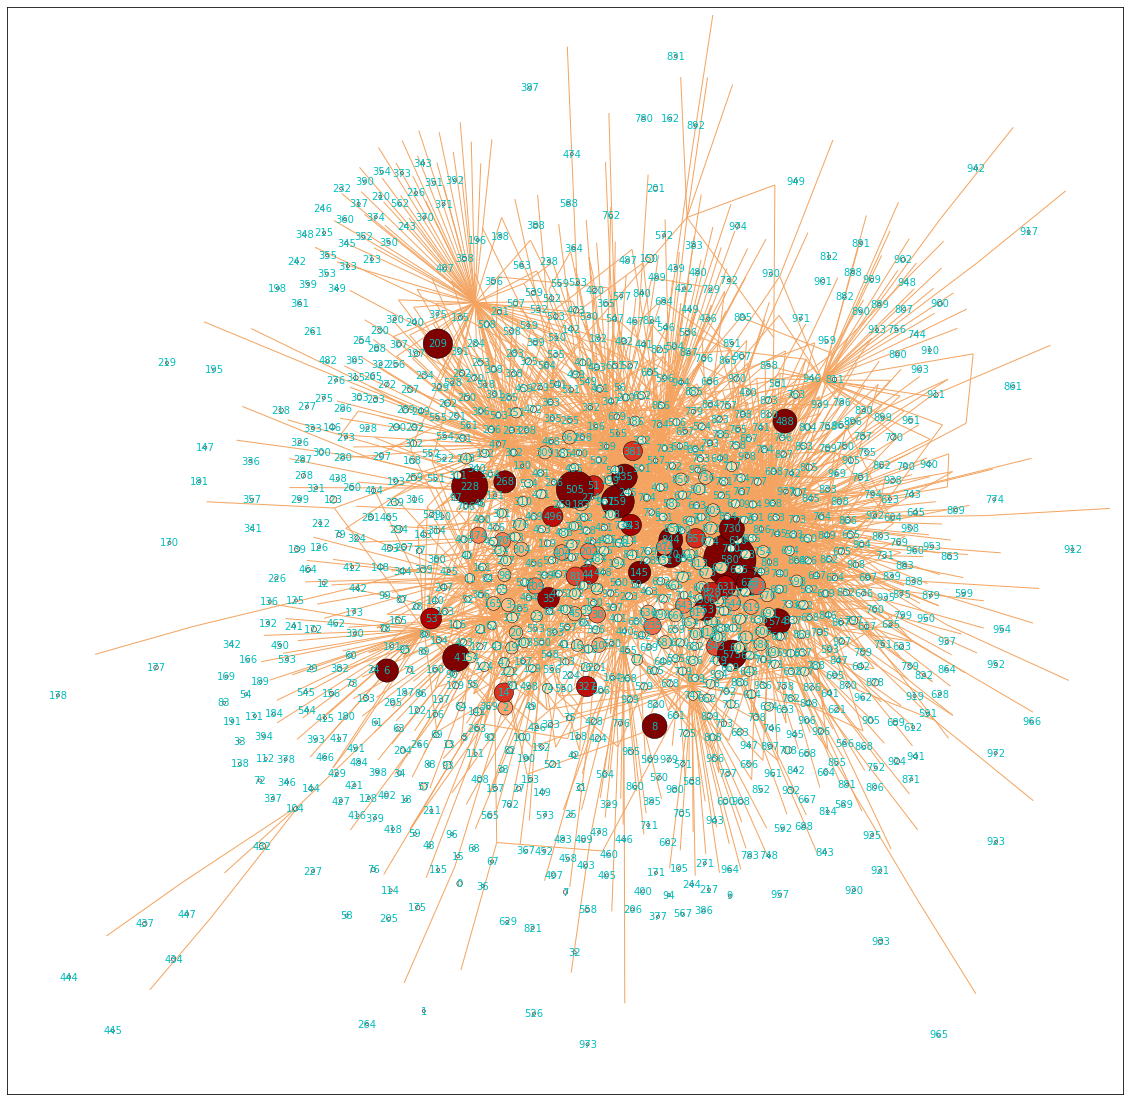

In [24]:
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=500,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color='sandybrown',edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)
nx.draw_networkx_labels(G,pos=pos, font_color='c',font_size=10)

plt.show()

In [25]:
Q_key_node_list

[8, 505, 4, 580, 51, 228, 159]

In [26]:
I_key_node_list

[877,
 4,
 159,
 93,
 228,
 717,
 580,
 14,
 117,
 31,
 35,
 52,
 496,
 505,
 47,
 681,
 186,
 432,
 123,
 420,
 150,
 172,
 622,
 217,
 700,
 514,
 575,
 811,
 796,
 870,
 910,
 924]

In [27]:
louvain__key_node_list

[575, 4, 10, 159, 580, 505, 228, 435, 183, 488, 432, 836]

In [ ]:
# matching function:












In [28]:
degrees = dict(G.degree())
sorted_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)
Qmax=len(Q_key_node_list)
Imax=len(I_key_node_list)
Qcompare=sorted_nodes[0:Qmax]
Icompare=sorted_nodes[0:Imax]

def compare_lists(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Input lists must be of the same length.")

    total_elements = len(list1)
    matching_count = 0

    for i in range(total_elements):
        for j in range(total_elements):
            if list1[i] == list2[j]:
                matching_count += 1

    # Calculate the percentage of matching elements
    percentage_matching = (matching_count / (total_elements)) 

    return percentage_matching

percentage_matchQ = compare_lists(Qcompare, Q_key_node_list)
percentage_matchI = compare_lists(Icompare, I_key_node_list)

# top5 exist rate:
max5=sorted_nodes[0:5]

def calculate_percentage_existence(list_of_5, other_list):
    # Count the number of matching elements
    matching_count = sum(1 for number in list_of_5 if number in other_list)

    # Calculate the percentage of matching elements
    percentage_existence = (matching_count / 5) 

    return percentage_existence


percentage_existenceQ = calculate_percentage_existence(max5, Q_key_node_list)
percentage_existenceI = calculate_percentage_existence(max5, I_key_node_list)

In [29]:
percentage_matchQ

0.7142857142857143

In [30]:
percentage_matchI

0.28125

In [31]:
percentage_existenceQ 

0.8

In [32]:
percentage_existenceI

0.8